In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sales=pd.read_csv('/content/Advertising.csv')
sales = sales.drop('Unnamed: 0', axis=1)

In [15]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
sales.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [17]:
sales.shape

(200, 4)

In [18]:
duplicate_value=sales[sales.duplicated()]
print("Number of Duplicate Row:",duplicate_value.shape)
print(sales.isnull().sum())

Number of Duplicate Row: (0, 4)
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [19]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

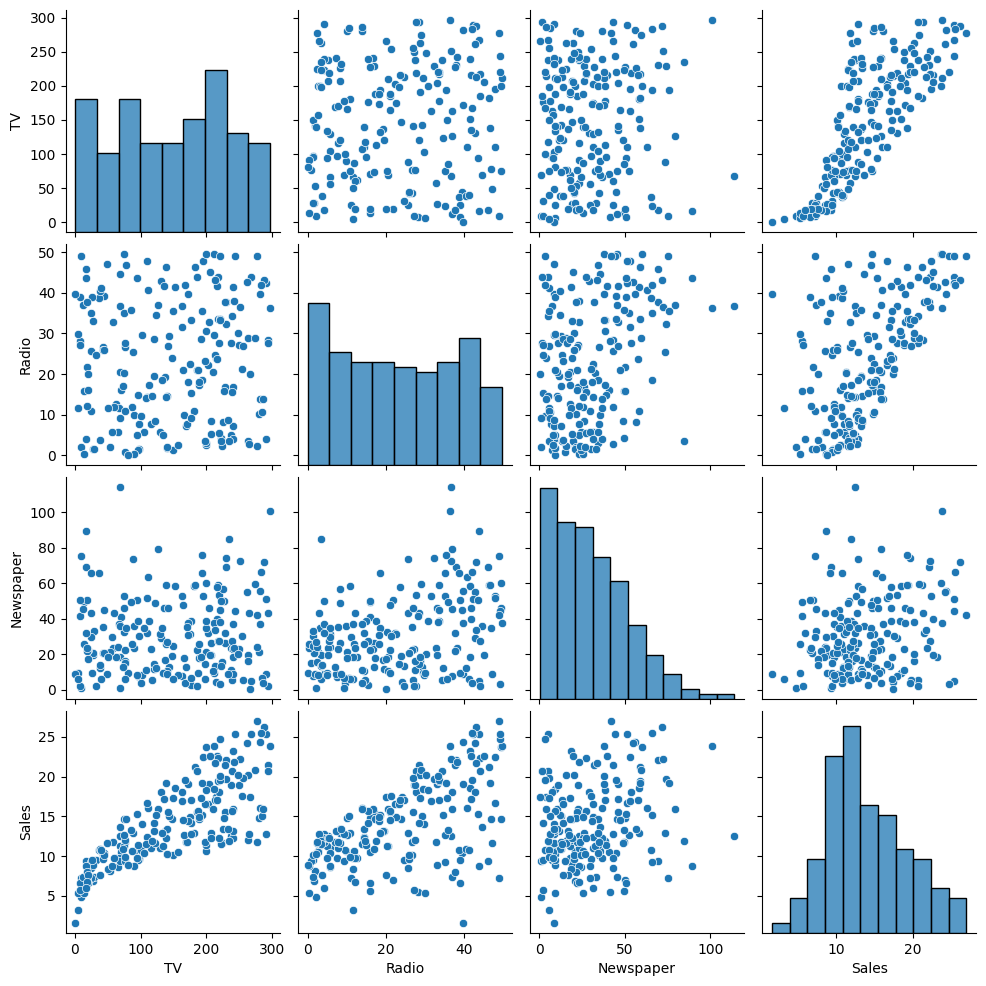

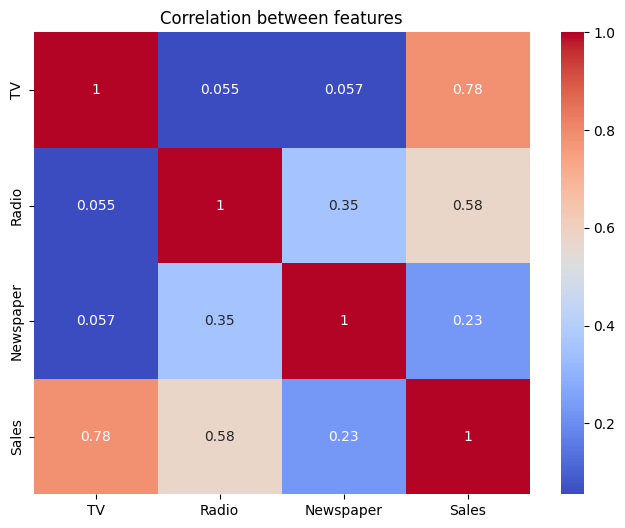

In [21]:
sns.pairplot(sales)
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(sales.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between features")
plt.show()

In [22]:
X = sales[['TV', 'Radio', 'Newspaper']]
y = sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.1740973539761033
R² Score: 0.899438024100912


In [26]:
coef = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coef)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


In [28]:
# Example: Predict for new ad spends
new_data = pd.DataFrame({'TV':[230.1], 'Radio':[37.8], 'Newspaper':[69.2]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 20.613971470156297


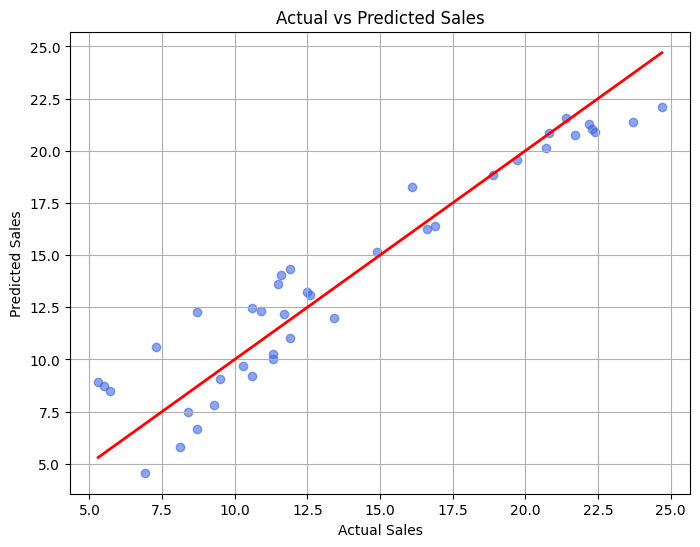

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="royalblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

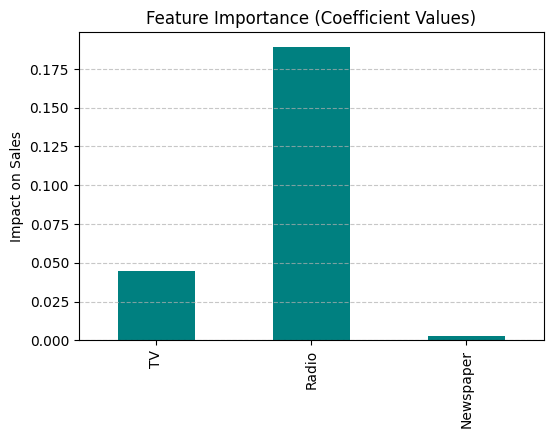

In [32]:
coef = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coef.plot(kind='bar', figsize=(6,4), color="teal", legend=False)
plt.title("Feature Importance (Coefficient Values)")
plt.ylabel("Impact on Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

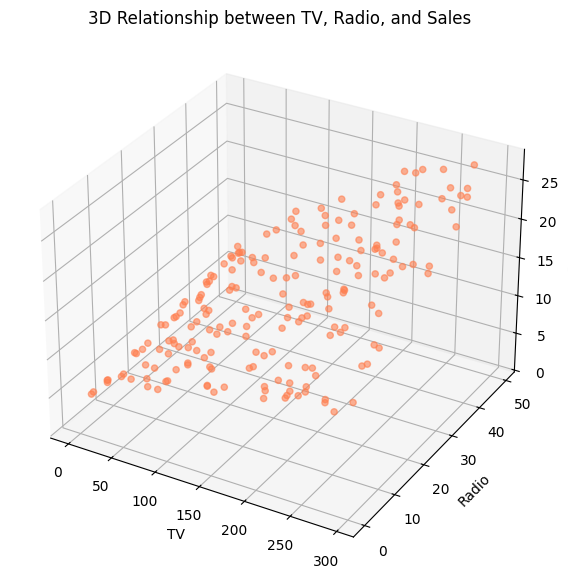

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sales['TV'], sales['Radio'], sales['Sales'], color='coral', alpha=0.6)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Relationship between TV, Radio, and Sales')
plt.show()

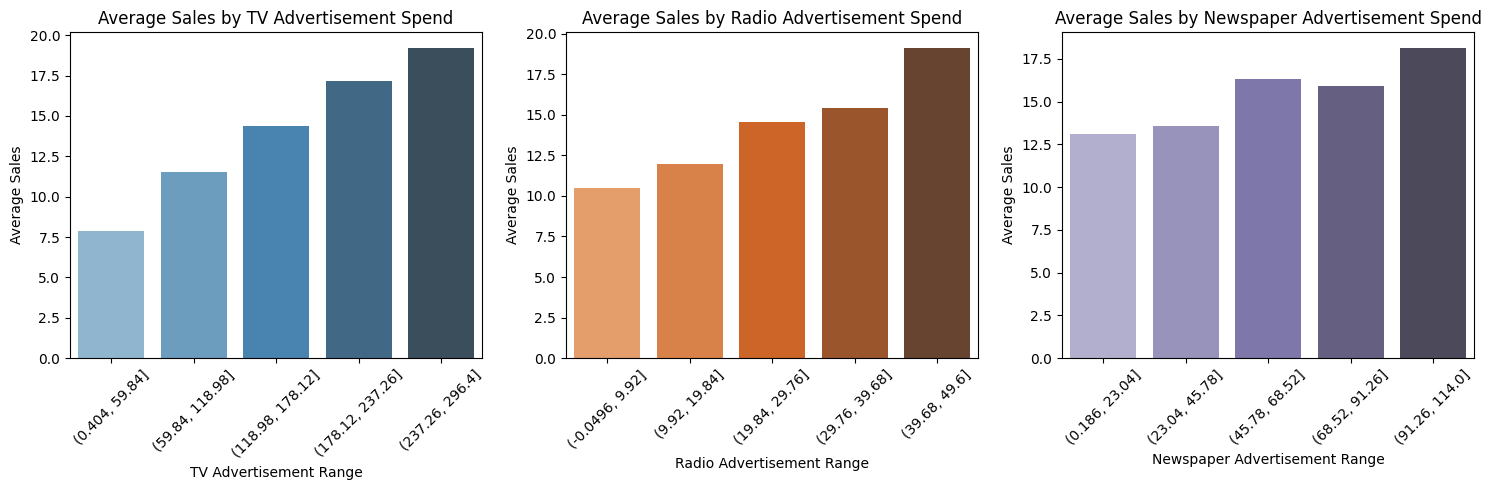

In [36]:
sales['TV_bin'] = pd.cut(sales['TV'], bins=5)
sales['Radio_bin'] = pd.cut(sales['Radio'], bins=5)
sales['Newspaper_bin'] = pd.cut(sales['Newspaper'], bins=5)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
tv_bar = sales.groupby('TV_bin', observed=False)['Sales'].mean().reset_index()
sns.barplot(x='TV_bin', y='Sales', data=tv_bar, palette='Blues_d', hue='TV_bin', legend=False)
plt.title('Average Sales by TV Advertisement Spend')
plt.xlabel('TV Advertisement Range')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
radio_bar = sales.groupby('Radio_bin', observed=False)['Sales'].mean().reset_index()
sns.barplot(x='Radio_bin', y='Sales', data=radio_bar, palette='Oranges_d', hue='Radio_bin', legend=False)
plt.title('Average Sales by Radio Advertisement Spend')
plt.xlabel('Radio Advertisement Range')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
news_bar = sales.groupby('Newspaper_bin', observed=False)['Sales'].mean().reset_index()
sns.barplot(x='Newspaper_bin', y='Sales', data=news_bar, palette='Purples_d', hue='Newspaper_bin', legend=False)
plt.title('Average Sales by Newspaper Advertisement Spend')
plt.xlabel('Newspaper Advertisement Range')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()